In [0]:
import json
import tensorflow as tf

In [0]:
with open('/content/sarcasm.json','r') as f:
  datastore=json.load(f)

sentences=[]
labels=[]
urls=[]
for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])
  urls.append(item['article_link'])

In [37]:
datastore[:5]

[{'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5',
  'headline': "former versace store clerk sues over secret 'black code' for minority shoppers",
  'is_sarcastic': 0},
 {'article_link': 'https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365',
  'headline': "the 'roseanne' revival catches up to our thorny political mood, for better and worse",
  'is_sarcastic': 0},
 {'article_link': 'https://local.theonion.com/mom-starting-to-fear-son-s-web-series-closest-thing-she-1819576697',
  'headline': "mom starting to fear son's web series closest thing she will have to grandchild",
  'is_sarcastic': 1},
 {'article_link': 'https://politics.theonion.com/boehner-just-wants-wife-to-listen-not-come-up-with-alt-1819574302',
  'headline': 'boehner just wants wife to listen, not come up with alternative debt-reduction ideas',
  'is_sarcastic': 1},
 {'article_link': 'https://www.huffingtonpost.com/entry/jk-rowling-w

In [38]:
sentences[:5]

["former versace store clerk sues over secret 'black code' for minority shoppers",
 "the 'roseanne' revival catches up to our thorny political mood, for better and worse",
 "mom starting to fear son's web series closest thing she will have to grandchild",
 'boehner just wants wife to listen, not come up with alternative debt-reduction ideas',
 'j.k. rowling wishes snape happy birthday in the most magical way']

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_Size=10000
embedding_dim=16
max_length=12
trunc_type='post'
padding_type='post'
oov_tok="<OOV>"
training_size=20000


In [0]:
training_sentences=sentences[0:training_size]
testing_sentences=sentences[training_size:]
training_labels=labels[0:training_size]
testing_labels=labels[training_size:]

In [0]:
tokenizer=Tokenizer(num_words=vocab_Size,oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index=tokenizer.word_index
training_sequences=tokenizer.texts_to_sequences(training_sentences)
training_padded=pad_sequences(training_sequences,maxlen=max_length,padding=padding_type,truncating=trunc_type)


In [0]:
testing_sequences=tokenizer.texts_to_sequences(testing_sentences)
testing_padded=pad_sequences(testing_sequences,maxlen=max_length,padding=padding_type,truncating=trunc_type)

In [0]:
model=tf.keras.Sequential([
                           tf.keras.layers.Embedding(vocab_Size,embedding_dim,input_length=max_length),
                           tf.keras.layers.GlobalAveragePooling1D(),
                           tf.keras.layers.Dense(24,activation='relu'),
                           tf.keras.layers.Dense(1,activation='sigmoid')
                           ])

In [0]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 12, 16)            160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [0]:
num_epochs=30


In [48]:
history=model.fit(training_padded,training_labels,epochs=num_epochs,validation_data=(testing_padded,testing_labels),verbose=2)

Train on 20000 samples, validate on 6709 samples
Epoch 1/30
20000/20000 - 3s - loss: 0.4780 - acc: 0.7636 - val_loss: 0.3525 - val_acc: 0.8484
Epoch 2/30
20000/20000 - 2s - loss: 0.2590 - acc: 0.8934 - val_loss: 0.3495 - val_acc: 0.8495
Epoch 3/30
20000/20000 - 2s - loss: 0.1888 - acc: 0.9277 - val_loss: 0.3814 - val_acc: 0.8474
Epoch 4/30
20000/20000 - 2s - loss: 0.1474 - acc: 0.9459 - val_loss: 0.4379 - val_acc: 0.8390
Epoch 5/30
20000/20000 - 2s - loss: 0.1184 - acc: 0.9593 - val_loss: 0.5021 - val_acc: 0.8323
Epoch 6/30
20000/20000 - 2s - loss: 0.0981 - acc: 0.9675 - val_loss: 0.5651 - val_acc: 0.8261
Epoch 7/30
20000/20000 - 2s - loss: 0.0817 - acc: 0.9729 - val_loss: 0.6189 - val_acc: 0.8238
Epoch 8/30
20000/20000 - 2s - loss: 0.0699 - acc: 0.9757 - val_loss: 0.6984 - val_acc: 0.8182
Epoch 9/30
20000/20000 - 2s - loss: 0.0580 - acc: 0.9829 - val_loss: 0.7700 - val_acc: 0.8152
Epoch 10/30
20000/20000 - 2s - loss: 0.0518 - acc: 0.9836 - val_loss: 0.8409 - val_acc: 0.8128
Epoch 11/3

In [0]:
import matplotlib.pyplot as plt

In [0]:
def plot_graphs(history,string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string,'val_'+string])
  plt.show()

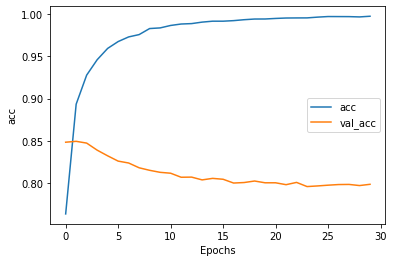

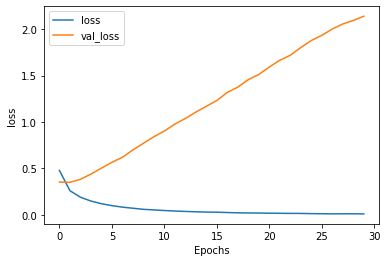

In [51]:
plot_graphs(history,"acc")
plot_graphs(history,"loss")